In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### Funções

In [2]:
def Covid_Ode(P, t):
    S, I, Q, R = P
    dS_dt = LAMBDA - mu*S - beta*S*I
    dI_dt = beta*S*I - (delta + mu + alpha_1 + gamma)*I
    dQ_dt = delta*I - epsilon*Q - alpha_2*Q - mu*Q
    dR_dt = gamma*I + epsilon*Q - mu*R
    return [dS_dt, dI_dt, dQ_dt, dR_dt]


def plot_trajetories(P0, t):
    sol = odeint(Covid_Ode, P0, t)
    S_plot = sol[:, 0]
    I_plot = sol[:, 1]
    Q_plot = sol[:, 2]
    R_plot = sol[:, 3]
    return S_plot, I_plot, Q_plot, R_plot


def jacobian_COVID(S, I, mu, beta, delta, alpha_1, gamma, epsilon, alpha_2):
    J = np.zeros([4, 4])
    J[0, 0] = - mu - beta*I
    J[0, 1] = - beta*S
    J[1, 0] = beta*I
    J[1, 1] = beta*S - (delta + mu + alpha_1 + gamma)
    J[2, 1] = delta
    J[2, 2] = - epsilon - alpha_2 - mu
    J[3, 1] = gamma
    J[3, 2] = epsilon
    J[3, 3] = - mu
    return J

def set_stability(eig_val):
    for eig in eig_val:
        if np.real(eig) > 0:
            return 'instável'
    return 'estável'

### Parâmetros

In [3]:
LAMBDA = 1.43
mu = 1.03
beta = 5
delta = 0.4
alpha_1 = 0.42
gamma = 1.05
epsilon = 0.6
alpha_2 = 0.4

### Plotando Trajetórias

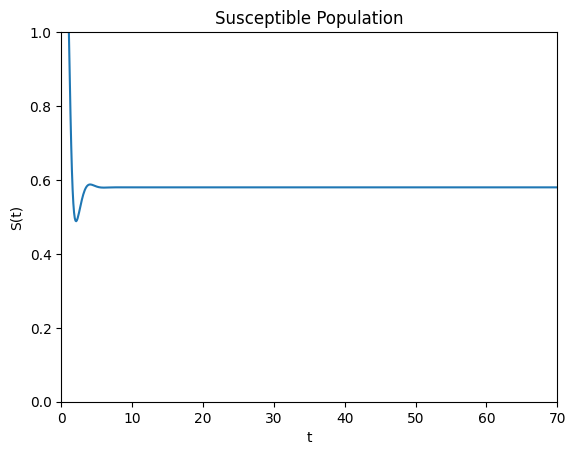

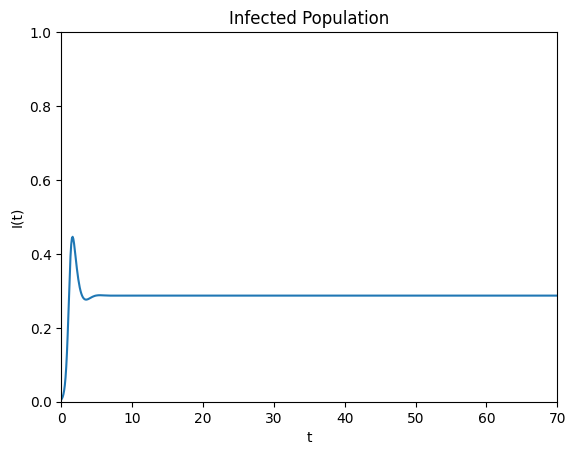

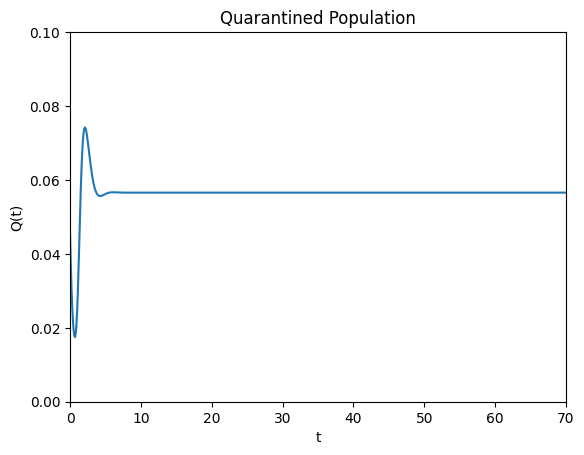

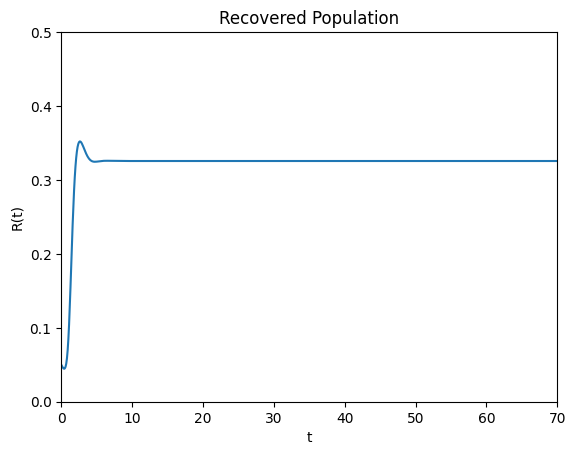

In [4]:
t = np.linspace(0, 100, 1000)

P0 = [1.44, 0.0056, 0.046, 0.05]

S_plot, I_plot, Q_plot, R_plot = plot_trajetories(P0, t)

plt.plot(t, S_plot)
plt.xlabel('t')
plt.ylabel('S(t)')
plt.xlim(0, 70)
plt.ylim(0, 1)
plt.title('Susceptible Population')
plt.show()

plt.plot(t, I_plot)
plt.xlabel('t')
plt.ylabel('I(t)')
plt.xlim(0, 70)
plt.ylim(0, 1)
plt.title('Infected Population')
plt.show()

plt.plot(t, Q_plot)
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.xlim(0, 70)
plt.ylim(0, 0.1)
plt.title('Quarantined Population')
plt.show()

plt.plot(t, R_plot)
plt.xlabel('t')
plt.ylabel('R(t)')
plt.xlim(0, 70)
plt.ylim(0, 0.5)
plt.title('Recovered Population')
plt.show()

### Análise do Estado Estacionário

In [5]:
See_vector = []
Iee_vector = []
Qee_vector = []
Ree_vector = []

See = LAMBDA/mu
Iee: float = 0
Qee: float = 0
Ree: float = 0

See_vector.append(See)
Iee_vector.append(Iee)
Qee_vector.append(Qee)
Ree_vector.append(Ree)

J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma, epsilon, alpha_2)

eig_val = np.linalg.eig(J)[0]
stability = set_stability(eig_val)
print(f'Estado Estacionário: S* = {See}, I* = {Iee}, Q* = {Qee}, R* = {Ree}')
print(f'Os autovalores são: {eig_val[0]}, {eig_val[1]}, {eig_val[2]} e {eig_val[3]}\nE o estado estacionário é {stability}.')

See = (delta + mu + alpha_1 + gamma)/beta
Iee = LAMBDA/(See*beta) - mu/beta
Qee = delta*Iee/(epsilon + alpha_2 + mu)
Ree = (gamma*Iee + epsilon*Qee)/mu

See_vector.append(See)
Iee_vector.append(Iee)
Qee_vector.append(Qee)
Ree_vector.append(Ree)

J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma, epsilon, alpha_2)

eig_val = np.linalg.eig(J)[0]
stability = set_stability(eig_val)
print(f'\nEstado Estacionário: S* = {See}, I* = {Iee}, Q* = {Qee}, R* = {Ree}')
print(f'Os autovalores são: {eig_val[0]}, {eig_val[1]}, {eig_val[2]} e {eig_val[3]}\nE o estado estacionário é {stability}.')


Estado Estacionário: S* = 1.3883495145631066, I* = 0, Q* = 0, R* = 0
Os autovalores são: -1.03, -1.03, -2.0300000000000002 e 4.041747572815533
E o estado estacionário é instável.

Estado Estacionário: S* = 0.5800000000000001, I* = 0.287103448275862, Q* = 0.0565721080346526, R* = 0.32563289855383176
Os autovalores são: (-1.03+0j), (-2.0300000000000002+0j), (-1.2327586206896552+1.6258247701137225j) e (-1.2327586206896552-1.6258247701137225j)
E o estado estacionário é estável.


### Planos de Fase

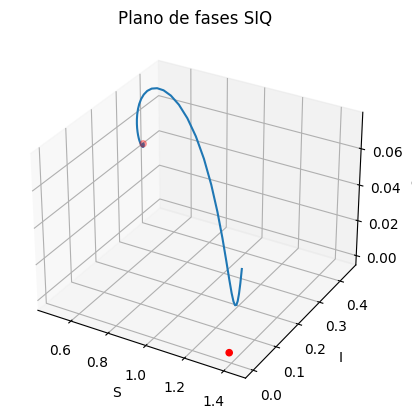

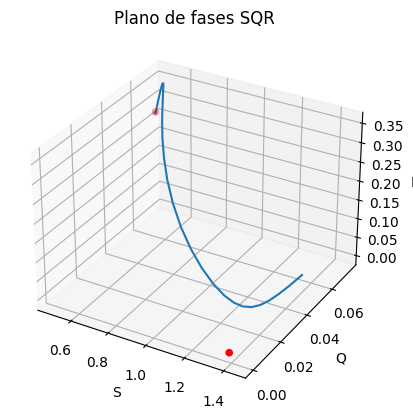

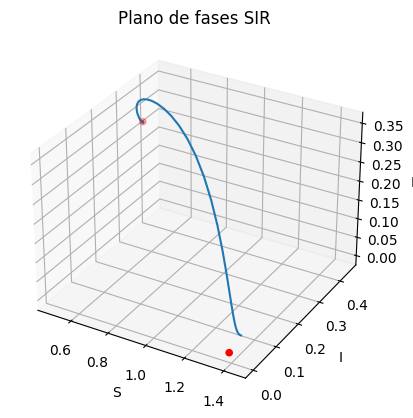

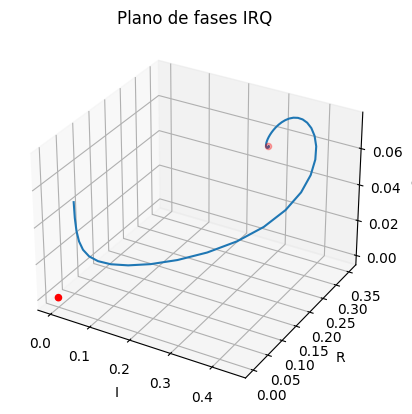

In [6]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.plot(S_plot, I_plot, Q_plot)
ax.scatter(See_vector,Iee_vector,Qee_vector,marker='o',color='red')
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('Q')
ax.set_title('Plano de fases SIQ')
plt.show()

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.plot(S_plot, Q_plot, R_plot)
ax.scatter(See_vector,Qee_vector,Ree_vector,marker='o',color='red')
ax.set_xlabel('S')
ax.set_ylabel('Q')
ax.set_zlabel('R')
ax.set_title('Plano de fases SQR')
plt.show()

fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')
ax.plot(S_plot, I_plot, R_plot)
ax.scatter(See_vector,Iee_vector,Ree_vector,marker='o',color='red')
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')
ax.set_title('Plano de fases SIR')
plt.show()

fig = plt.figure(4)
ax = fig.add_subplot(111, projection='3d')
ax.plot(I_plot, R_plot, Q_plot)
ax.scatter(Iee_vector,Ree_vector,Qee_vector,marker='o',color='red')
ax.set_xlabel('I')
ax.set_ylabel('R')
ax.set_zlabel('Q')
ax.set_title('Plano de fases IRQ')
plt.show()


# Análises Paramétricas

#### Variando Taxa de Mortes Naturais (µ)

C:\Users\The_R\AppData\Local\Temp\ipykernel_10248\922477934.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  Ree = (gamma*Iee + epsilon*Qee)/mu_value


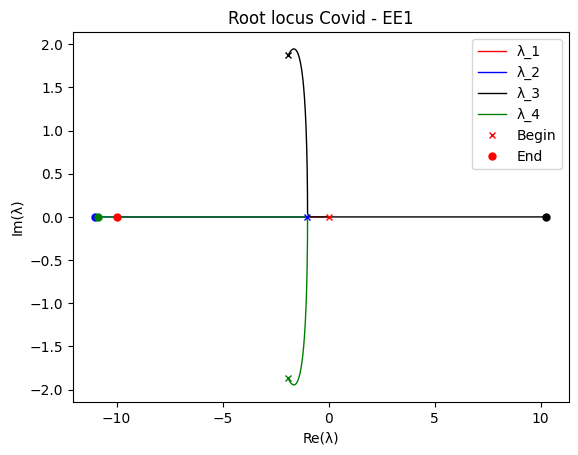

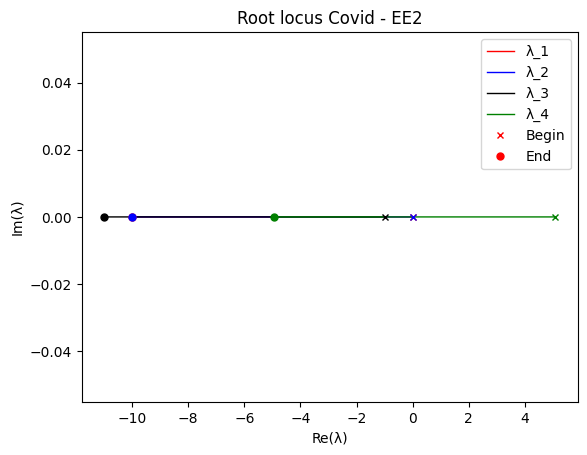

In [7]:
n = 10000
mu_vector = np.linspace(0, 10000, n)
for i, mu_value in enumerate(mu_vector):
    mu_vector[i] = mu_value/1000

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, mu_value in enumerate(mu_vector):

    See = (delta + mu_value + alpha_1 + gamma)/beta
    Iee = LAMBDA/(See*beta) - mu_value/beta
    Qee = delta*Iee/(epsilon + alpha_2 + mu_value)
    Ree = (gamma*Iee + epsilon*Qee)/mu_value
    
    J = jacobian_COVID(See, Iee, mu_value, beta, delta,
                   alpha_1, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, mu_value)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE1')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, mu_value in enumerate(mu_vector):

    See = LAMBDA/mu
    Iee: float = 0
    Qee: float = 0
    Ree: float = 0
        
    J = jacobian_COVID(See, Iee, mu_value, beta, delta,
                   alpha_1, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, mu_value)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE2')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()



#### Variando Beta

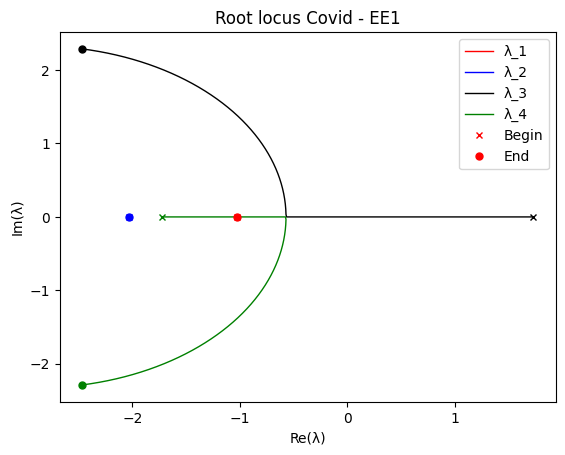

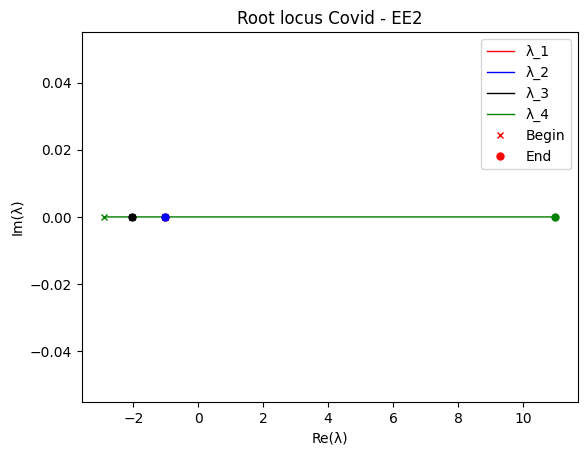

In [8]:
n = 10000
beta_vector = np.linspace(1, 10000, n)
for i, beta_value in enumerate(beta_vector):
    beta_vector[i] = beta_value/1000

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, beta_value in enumerate(beta_vector):

    See = (delta + mu + alpha_1 + gamma)/beta_value
    Iee = LAMBDA/(See*beta_value) - mu/beta_value
    Qee = delta*Iee/(epsilon + alpha_2 + mu)
    Ree = (gamma*Iee + epsilon*Qee)/mu
    
    J = jacobian_COVID(See, Iee, mu, beta_value, delta,
                   alpha_1, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, beta_value)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE1')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, beta_value in enumerate(beta_vector):

    See = LAMBDA/mu
    Iee: float = 0
    Qee: float = 0
    Ree: float = 0
    
    J = jacobian_COVID(See, Iee, mu, beta_value, delta,
                   alpha_1, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, beta_value)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE2')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()


#### Variando delta

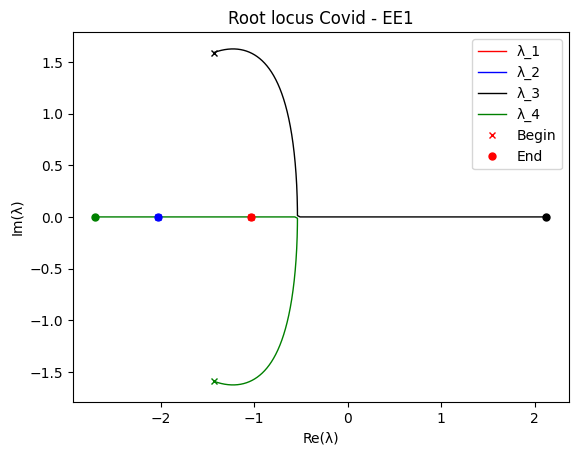

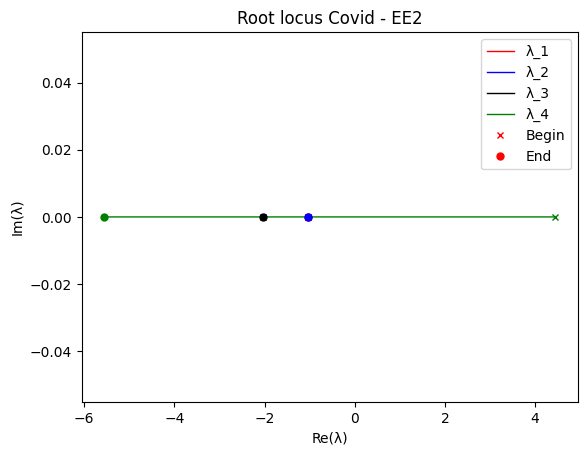

In [9]:
n = 10000
delta_vector = np.linspace(1, 10000, n)
for i, delta_value in enumerate(delta_vector):
    delta_vector[i] = delta_value/1000

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, delta_value in enumerate(delta_vector):

    See = (delta_value + mu + alpha_1 + gamma)/beta
    Iee = LAMBDA/(See*beta) - mu/beta
    Qee = delta_value*Iee/(epsilon + alpha_2 + mu)
    Ree = (gamma*Iee + epsilon*Qee)/mu
    
    J = jacobian_COVID(See, Iee, mu, beta, delta_value,
                   alpha_1, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, delta_value)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE1')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, delta_value in enumerate(delta_vector):

    See = LAMBDA/mu
    Iee: float = 0
    Qee: float = 0
    Ree: float = 0
    
    J = jacobian_COVID(See, Iee, mu, beta, delta_value,
                   alpha_1, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, delta_value)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE2')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()


#### Variando alpha1

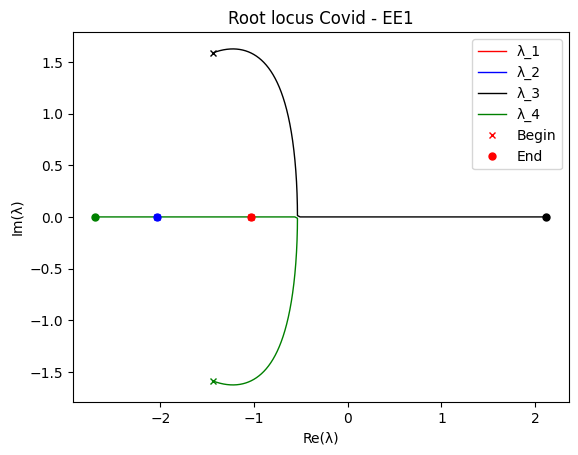

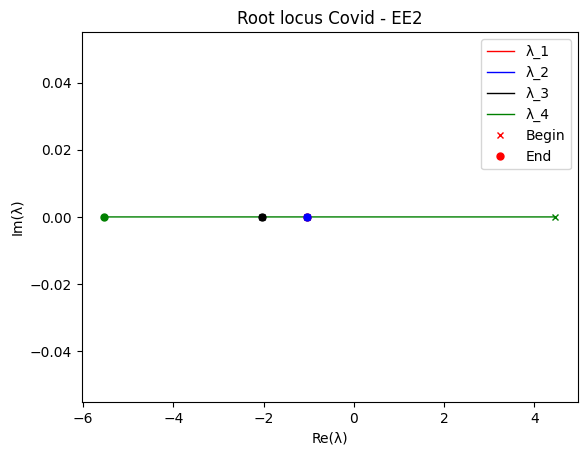

In [10]:
n = 10000
alpha_1_vector = np.linspace(1, 10000, n)
for i, alpha_1_value in enumerate(alpha_1_vector):
    alpha_1_vector[i] = alpha_1_value/1000

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, alpha_1_value in enumerate(alpha_1_vector):

    See = (delta + mu + alpha_1_value + gamma)/beta
    Iee = LAMBDA/(See*beta) - mu/beta
    Qee = delta*Iee/(epsilon + alpha_2 + mu)
    Ree = (gamma*Iee + epsilon*Qee)/mu
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1_value, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, alpha_1_value)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE1')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, alpha_1_value in enumerate(alpha_1_vector):

    See = LAMBDA/mu
    Iee: float = 0
    Qee: float = 0
    Ree: float = 0
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1_value, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, alpha_1_value)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE2')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

#### Variando gamma

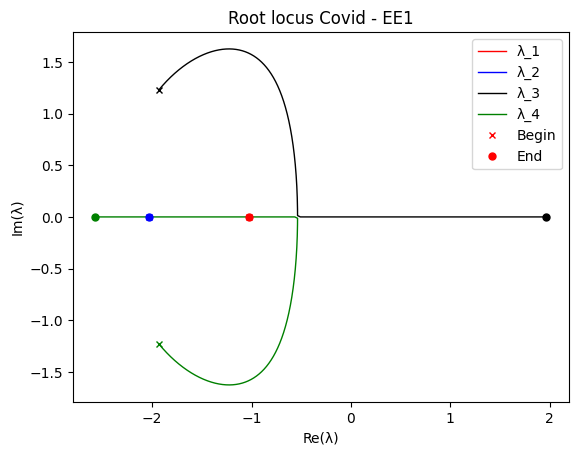

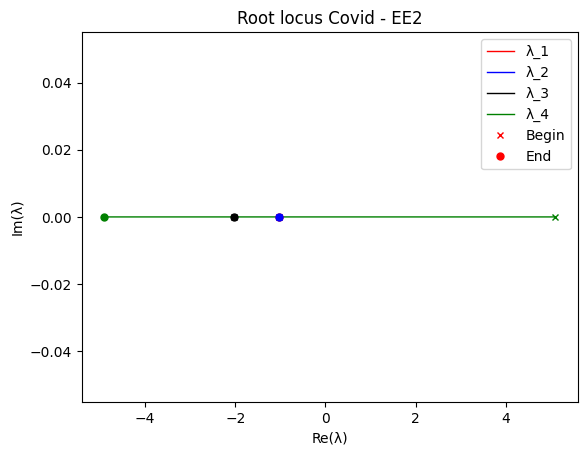

In [11]:
n = 10000
gamma_vector = np.linspace(1, 10000, n)
for i, gamma_value in enumerate(gamma_vector):
    gamma_vector[i] = gamma_value/1000

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, gamma_value in enumerate(gamma_vector):

    See = (delta + mu + alpha_1 + gamma_value)/beta
    Iee = LAMBDA/(See*beta) - mu/beta
    Qee = delta*Iee/(epsilon + alpha_2 + mu)
    Ree = (gamma_value*Iee + epsilon*Qee)/mu
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma_value, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE1')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, gamma_value in enumerate(gamma_vector):

    See = LAMBDA/mu
    Iee: float = 0
    Qee: float = 0
    Ree: float = 0
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma_value, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE2')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

#### Variando epsilon

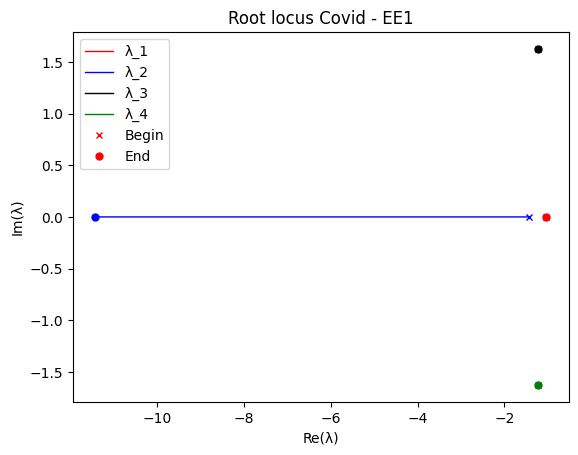

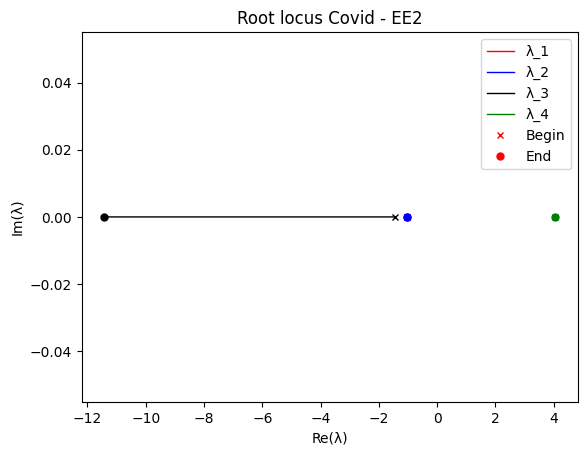

In [12]:
n = 10000
epsilon_vector = np.linspace(1, 10000, n)
for i, epsilon_value in enumerate(epsilon_vector):
    epsilon_vector[i] = epsilon_value/1000

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, epsilon_value in enumerate(epsilon_vector):

    See = (delta + mu + alpha_1 + gamma)/beta
    Iee = LAMBDA/(See*beta) - mu/beta
    Qee = delta*Iee/(epsilon_value + alpha_2 + mu)
    Ree = (gamma*Iee + epsilon_value*Qee)/mu
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma, epsilon_value, alpha_2)
    eig_val = np.linalg.eig(J)[0]

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE1')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, epsilon_value in enumerate(epsilon_vector):

    See = LAMBDA/mu
    Iee: float = 0
    Qee: float = 0
    Ree: float = 0
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma, epsilon_value, alpha_2)
    eig_val = np.linalg.eig(J)[0]

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE2')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

#### Variando alpha2

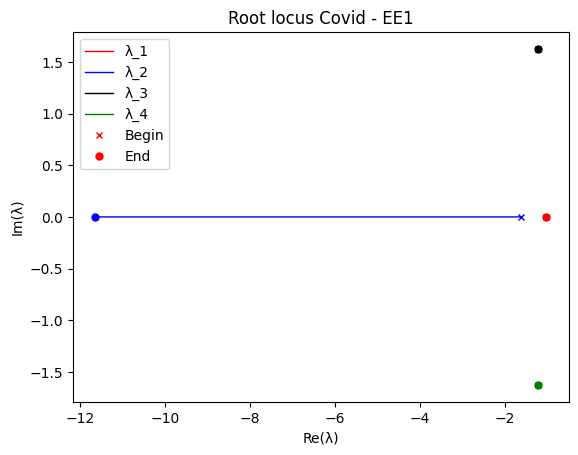

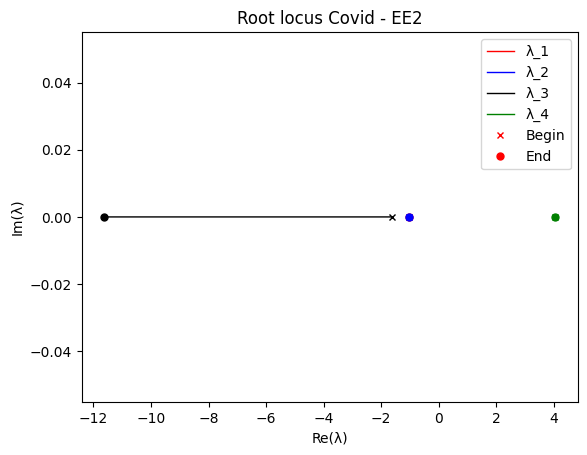

In [13]:
n = 10000
alpha_2_vector = np.linspace(1, 10000, n)
for i, alpha_2_value in enumerate(alpha_2_vector):
    alpha_2_vector[i] = alpha_2_value/1000

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, alpha_2_value in enumerate(alpha_2_vector):

    See = (delta + mu + alpha_1 + gamma)/beta
    Iee = LAMBDA/(See*beta) - mu/beta
    Qee = delta*Iee/(epsilon + alpha_2_value + mu)
    Ree = (gamma*Iee + epsilon*Qee)/mu
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma, epsilon, alpha_2_value)
    eig_val = np.linalg.eig(J)[0]

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE1')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, alpha_2_value in enumerate(alpha_2_vector):

    See = LAMBDA/mu
    Iee: float = 0
    Qee: float = 0
    Ree: float = 0
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma, epsilon, alpha_2_value)
    eig_val = np.linalg.eig(J)[0]

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE2')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

#### Variando lambda

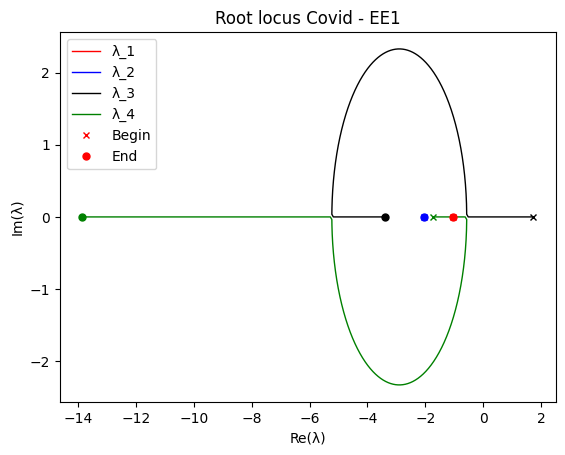

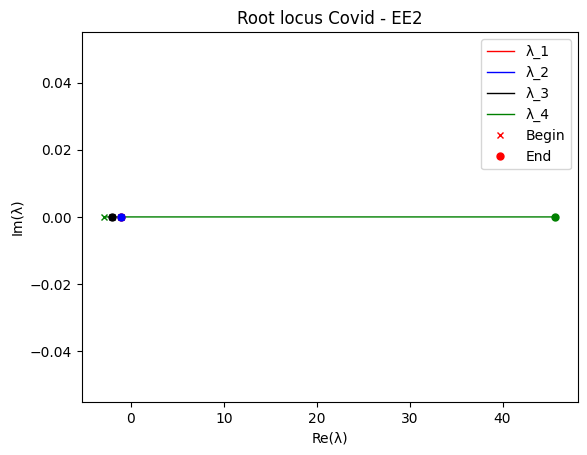

In [14]:
n = 10000
lambda_vector = np.linspace(1, 10000, n)
for i, lambda_value in enumerate(lambda_vector):
    lambda_vector[i] = lambda_value/1000

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, lambda_value in enumerate(lambda_vector):

    See = (delta + mu + alpha_1 + gamma)/beta
    Iee = lambda_value/(See*beta) - mu/beta
    Qee = delta*Iee/(epsilon + alpha_2 + mu)
    Ree = (gamma*Iee + epsilon*Qee)/mu
    
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, mu)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE1')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()

Real_1 = np.ones(n)
Imag_1 = np.ones(n)
Real_2 = np.ones(n)
Imag_2 = np.ones(n)
Real_3 = np.ones(n)
Imag_3 = np.ones(n)
Real_4 = np.ones(n)
Imag_4 = np.ones(n)
J = []

for j, lambda_value in enumerate(lambda_vector):

    See = lambda_value/mu
    Iee: float = 0
    Qee: float = 0
    Ree: float = 0
        
    J = jacobian_COVID(See, Iee, mu, beta, delta,
                   alpha_1, gamma, epsilon, alpha_2)
    eig_val = np.linalg.eig(J)[0]
    # print(eig_val, mu)

    Real_1[j] = np.real(eig_val[0])
    Imag_1[j] = np.imag(eig_val[0])

    Real_2[j] = np.real(eig_val[1])
    Imag_2[j] = np.imag(eig_val[1])
    
    Real_3[j] = np.real(eig_val[2])
    Imag_3[j] = np.imag(eig_val[2])

    Real_4[j] = np.real(eig_val[3])
    Imag_4[j] = np.imag(eig_val[3])
    
plt.plot(Real_1, Imag_1, 'r-', Real_2, Imag_2, 'b-', Real_3, Imag_3, 'k-', Real_4, Imag_4, 'g-', linewidth=1)
plt.title('Root locus Covid - EE2')
plt.xlabel('Re(λ)')
plt.ylabel('Im(λ)')
plt.plot(Real_1[0], Imag_1[0], 'rx', Real_1[n-1],
         Imag_1[n-1], 'ro', linewidth=1, markersize=5)
plt.plot(Real_2[0], Imag_2[0], 'bx', Real_2[n-1],
         Imag_2[n-1], 'bo', linewidth=1, markersize=5)
plt.plot(Real_3[0], Imag_3[0], 'kx', Real_3[n-1],
         Imag_3[n-1], 'ko', linewidth=1, markersize=5)
plt.plot(Real_4[0], Imag_4[0], 'gx', Real_4[n-1],
         Imag_4[n-1], 'go', linewidth=1, markersize=5)
plt.legend(['λ_1', 'λ_2', 'λ_3', 'λ_4', 'Begin', 'End'])
plt.show()